In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("/home/santiago/Desktop/Organizacion De Datos (75.06)/TP1/Hospitales/establecimientos-educativos-prov-bsas.csv")

## 6.2 - Escuelas
 En esta seccion analizaremos si el precio del metro cuadrado para una vivienda tiene alguna relacion con la distancia a algun establecimiento educativo.

In [2]:
#Veo los distintos atributos y sus tipos
centros_de_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22289 entries, 0 to 22288
Data columns (total 25 columns):
geometry.coordinates                22289 non-null object
properties.gid                      22289 non-null int64
properties.idserv                   22289 non-null int64
properties.nombre                   22289 non-null object
properties.clave                    22289 non-null object
properties.cueanexo                 22289 non-null int64
properties.calle                    22150 non-null object
properties.nro_calle                20461 non-null object
properties.localidad                22289 non-null object
properties.referencia               6021 non-null object
properties.email                    19822 non-null object
properties.telefono                 21564 non-null object
properties.codigo_postal            21065 non-null float64
properties.distrito                 22289 non-null object
properties.region_educativa         22289 non-null int64
properties.sector        

In [3]:
#Veo que tipos de establecimiento hay
centros_de_educacion['properties.tipo_establecimiento'].value_counts()[:5]

ESCUELA DE EDUCACIÓN PRIMARIA    6363
ESCUELA SECUNDARIA               4182
JARDÍN DE INFANTES               4171
ESCUELA DE EDUCACIÓN ESPECIAL    1707
CENTRO DE ADULTOS (EGBA)          991
Name: properties.tipo_establecimiento, dtype: int64

#### Dada las cantidades, es muy probable que tengan mayor influencia las escuelas primarias, secundarias y jardines de infantes

In [4]:
centros_de_educacion = centros_de_educacion[(centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA DE EDUCACIÓN PRIMARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA SECUNDARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'JARDÍN DE INFANTES')]

In [5]:
#Me interesa la localidad, la clave (por si necesito tener en cuenta los duplicados) y las coordenadas
loc_centros_edu =  centros_de_educacion[["geometry.coordinates","properties.nombre","properties.distrito"]].copy()
#Cambio los nombres por comodidad 
loc_centros_edu['distrito'] = loc_centros_edu['properties.distrito']
loc_centros_edu['coordenadas'] = loc_centros_edu['geometry.coordinates']
loc_centros_edu['nombre_escuela'] = loc_centros_edu['properties.nombre']
loc_centros_edu = loc_centros_edu[['coordenadas','distrito','nombre_escuela']]

In [6]:
#Separo las coordenadas
loc_centros_edu['lon'], loc_centros_edu['lat'] = loc_centros_edu['coordenadas'].str.split(',', 1).str
loc_centros_edu.head(10)

,coordenadas,distrito,nombre_escuela,lon,lat
18,"-62.76344792178401,-37.17682809444085",Adolfo Alsina,"JARDIN DE INFANTES Nº901 ""OLGA VIGNAU""",-62.76344792178401,-37.17682809444085
19,"-63.24724558731384,-37.16314534118442",Adolfo Alsina,JARDIN DE INFANTES Nº902,-63.24724558731384,-37.16314534118442
20,",-37.44672610592488",Adolfo Alsina,"JARDIN DE INFANTES Nº903 ""MARIA MONTESSORI""",,-37.44672610592488
21,"-63.34162596376706,",Adolfo Alsina,"JARDIN DE INFANTES Nº904 ""GABRIELA MISTRAL""",-63.34162596376706,
22,"-62.72566233225069,-37.17044240159538",Adolfo Alsina,"JARDIN DE INFANTES Nº905 ""VILLA EPECUEN""",-62.72566233225069,-37.17044240159538
23,"-63.25676909841502,-37.45432120256129",Adolfo Alsina,JARDIN DE INFANTES Nº906,-63.25676909841502,-37.45432120256129
24,",-36.87300069642487",Adolfo Alsina,"JARDIN DE INFANTES Nº908 ""AMERICO COPPINI""",,-36.87300069642487
25,"-62.76252490799794,-37.18045648747676",Adolfo Alsina,"JARDIN DE INFANTES Nº909 ""CUMELEN""",-62.76252490799794,-37.18045648747676
36,",-37.18363491372014",Adolfo Alsina,ESCUELA DE EDUCACIÓN SECUNDARIA Nº2,,-37.18363491372014
37,"-63.11460401666187,-37.44670507437951",Adolfo Alsina,ESCUELA DE EDUCACIÓN SECUNDARIA Nº3,-63.11460401666187,-37.44670507437951


In [7]:
#Elimino aquellos registros a los que le falta alguna coordenada
loc_centros_edu.dropna(inplace = True)
loc_centros_edu = loc_centros_edu[(loc_centros_edu['lon'] != "") & (loc_centros_edu['lat'] != "")].copy()
loc_centros_edu = loc_centros_edu[['lon','lat','distrito','nombre_escuela']]
#Me interesa convertir las coordenadas a algun tipo numerico
loc_centros_edu[['lat','lon']] = loc_centros_edu[['lat','lon']].apply(pd.to_numeric,errors='coerce')
loc_centros_edu.dropna(inplace=True)
loc_centros_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7536 entries, 18 to 22287
Data columns (total 4 columns):
lon               7536 non-null float64
lat               7536 non-null float64
distrito          7536 non-null object
nombre_escuela    7536 non-null object
dtypes: float64(2), object(2)
memory usage: 294.4+ KB


In [8]:
loc_centros_edu.head(10)

,lon,lat,distrito,nombre_escuela
18,-62.763448,-37.176828,Adolfo Alsina,"JARDIN DE INFANTES Nº901 ""OLGA VIGNAU"""
19,-63.247246,-37.163145,Adolfo Alsina,JARDIN DE INFANTES Nº902
22,-62.725662,-37.170442,Adolfo Alsina,"JARDIN DE INFANTES Nº905 ""VILLA EPECUEN"""
23,-63.256769,-37.454321,Adolfo Alsina,JARDIN DE INFANTES Nº906
25,-62.762525,-37.180456,Adolfo Alsina,"JARDIN DE INFANTES Nº909 ""CUMELEN"""
37,-63.114604,-37.446705,Adolfo Alsina,ESCUELA DE EDUCACIÓN SECUNDARIA Nº3
44,-62.762111,-37.180183,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº1 ""JOSE DE SAN..."
45,-62.753242,-37.180533,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº3 ""JUAN BAUTIS..."
46,-63.266903,-37.046765,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº4 ""ANTARTIDA A..."
47,-63.291628,-36.924717,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº5 ""MARIANO MOR..."


In [9]:
#Ya tengo las coordenadas de cada centro en cada barrio de la provincia
#Ahora agrupo por clave (no me interesan duplicados)
loc_centros_edu = loc_centros_edu.drop_duplicates(keep=False)
loc_centros_edu.head(10)
#Quedan 6504 establecimientos luego de la limpieza de datos

,lon,lat,distrito,nombre_escuela
18,-62.763448,-37.176828,Adolfo Alsina,"JARDIN DE INFANTES Nº901 ""OLGA VIGNAU"""
19,-63.247246,-37.163145,Adolfo Alsina,JARDIN DE INFANTES Nº902
22,-62.725662,-37.170442,Adolfo Alsina,"JARDIN DE INFANTES Nº905 ""VILLA EPECUEN"""
23,-63.256769,-37.454321,Adolfo Alsina,JARDIN DE INFANTES Nº906
25,-62.762525,-37.180456,Adolfo Alsina,"JARDIN DE INFANTES Nº909 ""CUMELEN"""
37,-63.114604,-37.446705,Adolfo Alsina,ESCUELA DE EDUCACIÓN SECUNDARIA Nº3
44,-62.762111,-37.180183,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº1 ""JOSE DE SAN..."
45,-62.753242,-37.180533,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº3 ""JUAN BAUTIS..."
46,-63.266903,-37.046765,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº4 ""ANTARTIDA A..."
47,-63.291628,-36.924717,Adolfo Alsina,"ESCUELA DE EDUCACIÓN PRIMARIA Nº5 ""MARIANO MOR..."


##### En un primer momento, puede ser util saber la cantidad de establecimientos que se registran en cada barrio

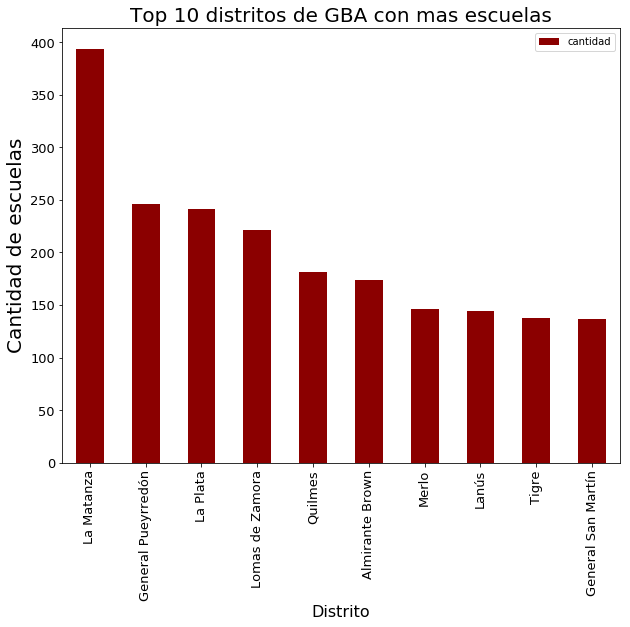

In [12]:
escuelas_por_barrio = loc_centros_edu[['distrito']].copy()
escuelas_por_barrio['cantidad'] = escuelas_por_barrio.groupby('distrito')['distrito'].transform(pd.Series.value_counts)
escuelas_por_barrio = escuelas_por_barrio.groupby('distrito').count()
top_10 = escuelas_por_barrio.sort_values('cantidad', ascending = False)[:10]
%matplotlib inline
plot = top_10.plot(kind = 'bar',figsize=(10,8), color='DarkRed' ,fontsize=13)
plot.set_title('Top 10 distritos de GBA con mas escuelas', fontsize=20);
plot.set_xlabel('Distrito', fontsize=16);
plot.set_ylabel('Cantidad de escuelas', fontsize=20);

In [11]:
#Ahora cargo las propiedades de todos los archivos de properati
ventas_properati = pd.read_csv('/home/santiago/Desktop/Organizacion De Datos (75.06)/TP1/Hospitales/datos_procesados.csv',
                               low_memory =False)

In [12]:
#Ahora uno todos los dataframes
ventas_properati.properati_url.count() #Se tienen 493836 registros

493836

##### Ahora simplemente  cuento cuantas propiedades en la provincia de Buenos Aires hay registradas (pues solo poseo datos de GBA)

In [13]:
#Me enfoco solo en provincia, dado que solo tengo datos alli
#Agrupo por properati_url
ventas_properati_gba = ventas_properati[ventas_properati.place_with_parent_names.str.contains("Buenos Aires") | 
                                        ventas_properati.place_with_parent_names.str.contains("Bs.As")].copy()
ventas_properati_gba.properati_url.count()
#259288 propiedades en GBA

259288

In [14]:
#Me interesa solo del 2013 en adelante
ventas_properati_gba = ventas_properati_gba[ventas_properati_gba.created_on.str.contains('2012') ==False]
#Elimino duplicados
ventas_properati_gba.drop_duplicates(subset='properati_url', keep="first", inplace=True)


In [15]:
#Ahora solo me quedo con las columnas que me interesan para este analisis
ventas_properati_gba = ventas_properati_gba[['place_name','price_usd_per_m2','lat','lon']]
#Cambio los nombres por comodidad
ventas_properati_gba['Localidad'] = ventas_properati_gba['place_name']
ventas_properati_gba['Precio_por_metro_cuadrado(usd)'] = ventas_properati_gba['price_usd_per_m2']
ventas_properati_gba = ventas_properati_gba[['Localidad','Precio_por_metro_cuadrado(usd)','lat','lon']]
ventas_properati.dropna(inplace=True)
ventas_properati_gba.lat.count()
#Se tienen 123196 propiedades en GBA, sin atributos nulos y cuya publicacion aparecio despues del 2012

123196

#### Ahora, buscamos para cada propiedad, aquella escuela mas cercana

In [16]:
#Voy a buscar, para cada propiedad, cual es el establecimiento escolar mas cercano, y la distancia al mismo
#Cuando logre hacer esto, voy a graficar el precio de la propiedad vs la distancia al establecimiento mas cercano
precio_segun_distancia = ventas_properati_gba.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = 0
precio_segun_distancia.dropna(inplace=True)
precio_segun_distancia.head(10)

,Localidad,Precio_por_metro_cuadrado(usd),lat,lon,distancia_escuela_mas_cercana(m)
3893,Torreón,1875.000000,-38.009416,-57.537972,0
3894,Chauvín,1146.153846,-38.014223,-57.564289,0
3895,Parque Luro,1500.000000,-37.979652,-57.554066,0
3900,Lanús Oeste,2000.000000,-34.637438,-58.407555,0
3901,Tigre,2000.000000,-34.425087,-58.579658,0
3903,Jose Leon Suarez,766.666667,-34.528673,-58.573267,0
3904,Olivos,2275.379310,-34.546085,-58.458126,0
3905,Olivos,2500.000000,-34.546085,-58.458126,0
3906,Los Polvorines,1318.181818,-34.524911,-58.708832,0
3907,San Miguel,1400.000000,-34.533983,-58.721262,0


In [17]:
#Defino una funcion que calcula la distancia entre dos puntos, utilizando la distancia de haversine
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
    #return np.abs((lat1 - lat2) + (lon1 - lon2))

def encontrar_escuela_mas_cercana(lat, lon):
    distancias = loc_centros_edu.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return loc_centros_edu.loc[distancias.idxmin(), 'nombre_escuela']

def dist2(lat,lon):
    distancias = loc_centros_edu.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()
    
precio_segun_distancia['escuela_mas_cercana'] = precio_segun_distancia[:10000].apply(lambda row: encontrar_escuela_mas_cercana(
                                                                                  row['lat'], row['lon']), axis=1)
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = precio_segun_distancia[:10000].apply(lambda row: dist2(row['lat'], 
                                                                                       row['lon']), axis=1)

In [18]:
precio_segun_distancia = precio_segun_distancia[['Localidad','Precio_por_metro_cuadrado(usd)',
                                                'distancia_escuela_mas_cercana(m)','escuela_mas_cercana']]
#EL dataframe final de este analisis quedo de la siguiente forma
precio_segun_distancia.head()

,Localidad,Precio_por_metro_cuadrado(usd),distancia_escuela_mas_cercana(m),escuela_mas_cercana
3893,Torreón,1875.000000,503.163042,COLEGIO SAN AGUSTIN
3894,Chauvín,1146.153846,130.570679,INSTITUTO ALBERT EINSTEIN
3895,Parque Luro,1500.000000,434.343628,ESCUELA DE EDCUACIÓN SECUNDARIA Nº67
3900,Lanús Oeste,2000.000000,2998.409188,"ESCUELA DE EDUCACIÓN PRIMARIA Nº13 ""HIPOLITO Y..."
3901,Tigre,2000.000000,435.546146,COLEGIO DE LA RECONQUISTA


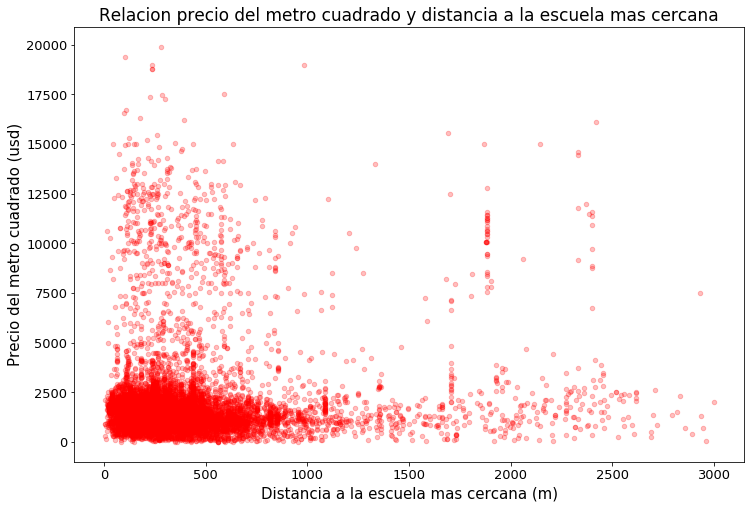

In [19]:
%matplotlib inline
df = precio_segun_distancia[precio_segun_distancia['distancia_escuela_mas_cercana(m)']< 3000]
final = df[df['Precio_por_metro_cuadrado(usd)']< 20000]
plot = final.plot.scatter('distancia_escuela_mas_cercana(m)', 'Precio_por_metro_cuadrado(usd)',alpha=0.25, figsize=(12,8),
                           color = 'red', fontsize = 13, title ='Relacion precio por metro cuadrado\
                 y distancia a escuela mas cercana')
plot.set_xlabel("Distancia a la escuela mas cercana (m)", fontsize = 15)
plot.set_ylabel("Precio del metro cuadrado (usd)", fontsize = 15)
plot.set_title("Relacion precio del metro cuadrado y distancia a la escuela mas cercana", fontsize = 17)

Puede observarse que en general, las propiedades con una escuela mas cerca tienden a costar mas caro